In [4]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from DelayControlSystem.delay_control import *

plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.family"] = "Times New Roman"

In [5]:
class PIDController:
    def __init__(self, Kp=1.0, Ki=0.0, Kd=0.0, dt=0.01, N=100):
        self.Kp = np.array(Kp)
        self.Ki = np.array(Ki)
        self.Kd = np.array(Kd)
        self.dt = dt
        self.integral = 0.0
        self.prev_error = 0.0
        self.N = N  # Derivative filter coefficient
        self.derivative_filtered = 0.0

    def __call__(self):
        print("The PID controller Gains are")
        print(f"Kp: {self.Kp}, Ki: {self.Ki}, Kd: {self.Kd}")

    def compute(self, setpoint, measurement):
        error = setpoint - measurement
        self.integral += error * self.dt
        derivative = (error - self.prev_error) / self.dt if self.dt > 0 else 0.0
        self.derivative_filtered = (
            (self.N * self.dt * derivative + self.derivative_filtered)
            / (self.N * self.dt + 1)
            if hasattr(self, "derivative_filtered")
            else derivative
        )
        output = (
            (self.Kp * error)
            + (self.Ki * self.integral)
            + (self.Kd * self.derivative_filtered)
        )
        self.prev_error = error
        return output

    def reset(self):
        self.integral = 0.0
        self.prev_error = 0.0
        self.derivative_filtered = 0.0

    def update_gains(self, Kp, Ki, Kd):
        self.Kp = np.array(Kp)
        self.Ki = np.array(Ki)
        self.Kd = np.array(Kd)

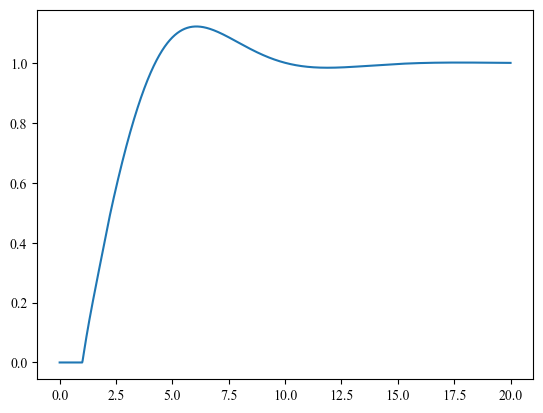

In [7]:
G = ctrl.TransferFunction([1], [1, 3, 2])  # Plant Transfer Function
delay_time = 1.0  # Delay time in seconds
dt = 0.01  # Time step for simulation
time = np.arange(0, 20, dt)  # Simulation time vector

Kp = 1.0
Ki = 1.0
Kd = 0.5

pid = PIDController(Kp=Kp, Ki=Ki, Kd=Kd, dt=dt)
Plant = DelayControlSystem(G, delay_time, dt)
Plant.reset()
for i, _ in enumerate(time):
    setpoint = 1.0  # Desired setpoint
    measurement = Plant.y[-1] if Plant.y else 0.0
    u = pid.compute(setpoint, measurement)
    Plant.step(u)

plt.plot(Plant.t, Plant.y, label="Output with Delay")
plt.show()